In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
plt.rcParams["figure.figsize"] = (15,17)

In [2]:
ipd.Audio('classical.wav')

In [3]:
ipd.Audio('rock.wav')

In [4]:
ipd.Audio('jazz.wav')

In [5]:
classical, sampling_rate = librosa.load('classical.wav')
rock, _ = librosa.load('rock.wav')
jazz, _ = librosa.load('jazz.wav')
print(f'sampling rate :', sampling_rate)


sampling rate : 22050


### Visualizing the Waveforms

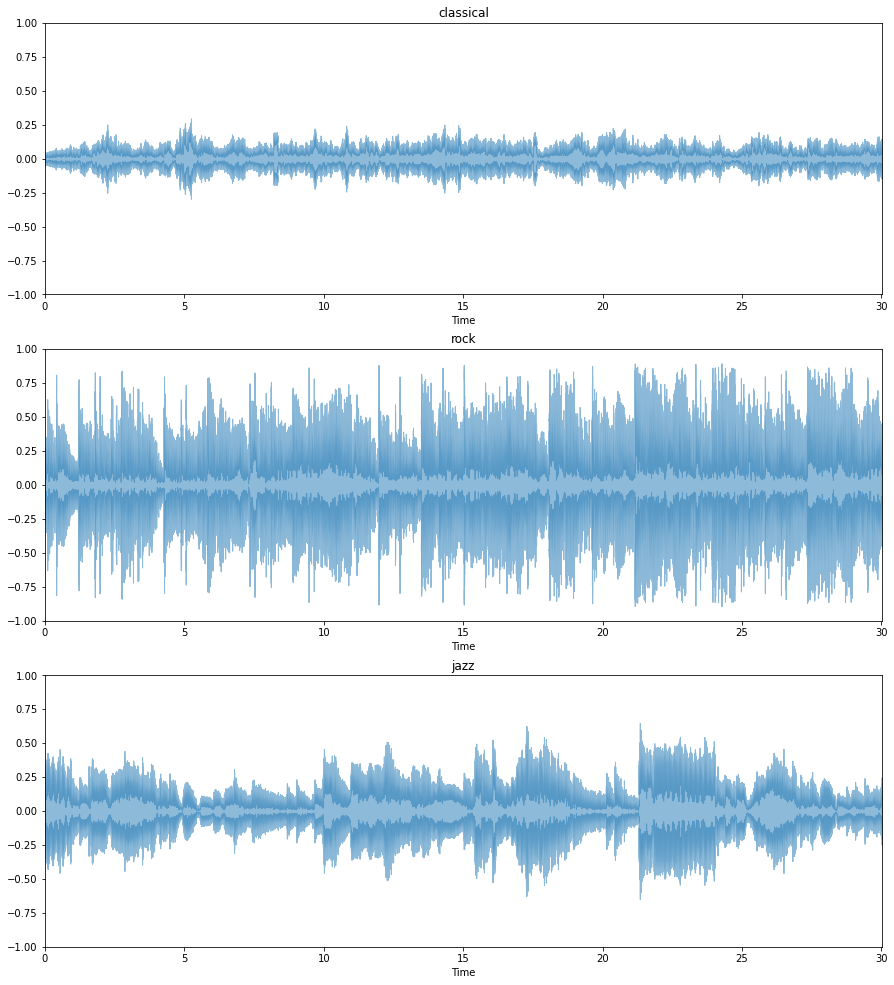

In [6]:
plt.subplot(3, 1, 1)
librosa.display.waveplot(classical, alpha=0.5)
plt.ylim((-1, 1))
plt.title("classical")

plt.subplot(3, 1, 2)
librosa.display.waveplot(rock, alpha=0.5)
plt.ylim((-1, 1))
plt.title("rock")

plt.subplot(3, 1, 3)
librosa.display.waveplot(jazz, alpha=0.5)
plt.ylim((-1, 1))
plt.title("jazz")

plt.show()

### Root Mean Square Energy 

In [7]:
rms_classical = librosa.feature.rms(classical, frame_length=1024, hop_length=512)[0]
rms_rock = librosa.feature.rms(rock, frame_length=1024, hop_length=512)[0]
rms_jazz = librosa.feature.rms(jazz, frame_length=1024, hop_length=512)[0]

### Visualize

In [8]:
frames = range(len(rms_classical))
t = librosa.frames_to_time(frames, hop_length = 512)

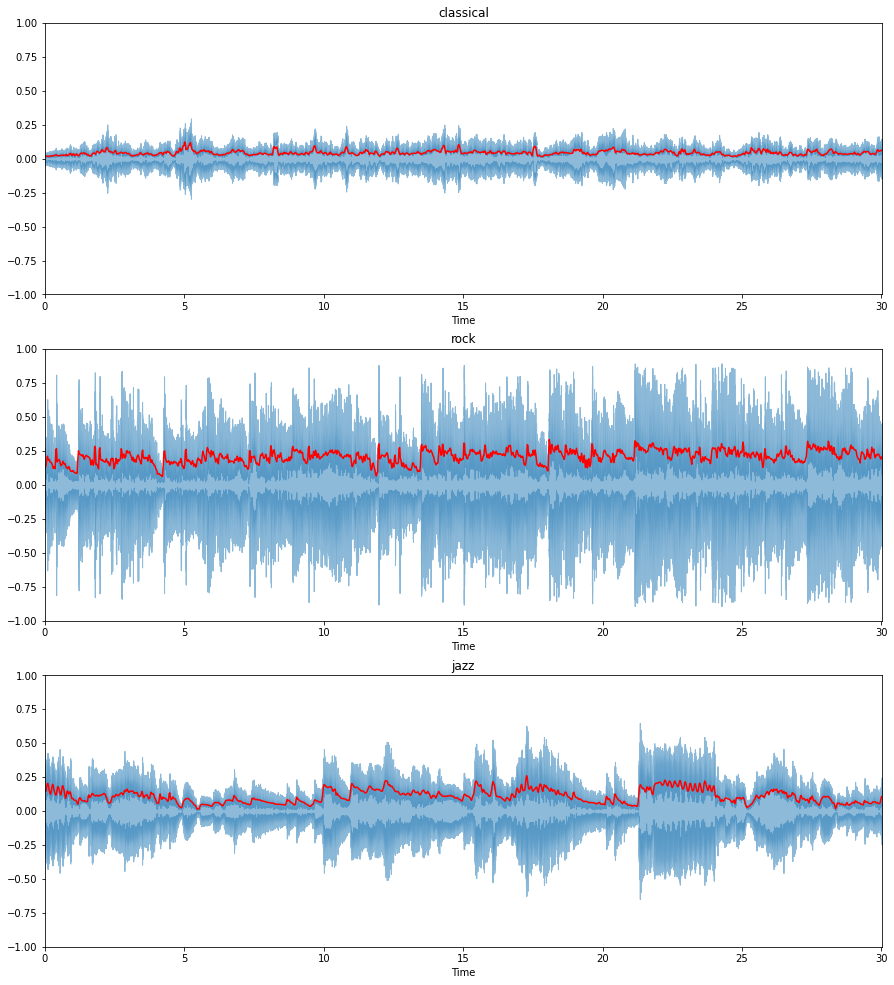

In [9]:
plt.subplot(3, 1, 1)
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t, rms_classical, color="r")
plt.ylim((-1, 1))
plt.title("classical")

plt.subplot(3, 1, 2)
librosa.display.waveplot(rock, alpha=0.5)
plt.plot(t, rms_rock, color="r")
plt.ylim((-1, 1))
plt.title("rock")

plt.subplot(3, 1, 3)
librosa.display.waveplot(jazz, alpha=0.5)
plt.plot(t, rms_jazz, color="r")
plt.ylim((-1, 1))
plt.title("jazz")

plt.show()

### RMSE from Scratch

In [10]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

### Zero Crossing Rate

In [11]:
zcr_classical = librosa.feature.zero_crossing_rate(classical, frame_length=1024, hop_length=512)[0]
zcr_rock = librosa.feature.zero_crossing_rate(rock, frame_length=1024, hop_length=512)[0]
zcr_jazz = librosa.feature.zero_crossing_rate(jazz, frame_length=1024, hop_length=512)[0]

### Visualize ZCR

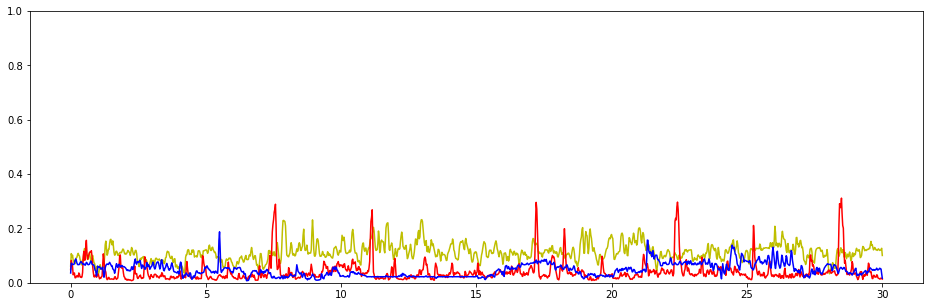

In [12]:
plt.figure(figsize=(16,5))
plt.plot(t, zcr_classical, color="y")
plt.plot(t, zcr_rock, color="r")
plt.plot(t, zcr_jazz, color="b")
plt.ylim(0, 1)
plt.show()